In [71]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [72]:
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.show()

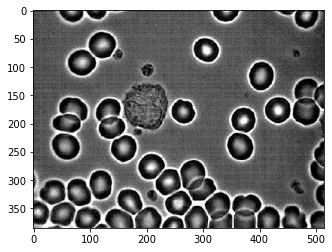

In [73]:
img = cv.imread('cells.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
m, n = gray.shape
imshow(gray)


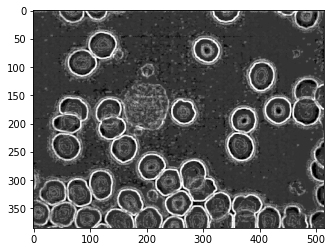

In [74]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4))
gradient = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel)
imshow(gradient)

(array([[ 17., 151.,  10., ...,   4.,   8.,   0.],
        [ 14.,  74.,  36., ...,   1.,   5.,   1.],
        [ 15., 158.,   6., ...,   5.,   9.,   0.],
        ...,
        [ 83., 162.,  23., ...,   7.,  11.,   7.],
        [ 72., 216.,   8., ...,   4.,  11.,   6.],
        [ 80., 219.,   6., ...,   1.,   9.,   5.]]),
 array([  0. ,  24.8,  49.6,  74.4,  99.2, 124. , 148.8, 173.6, 198.4,
        223.2, 248. ]),
 <a list of 514 BarContainer objects>)

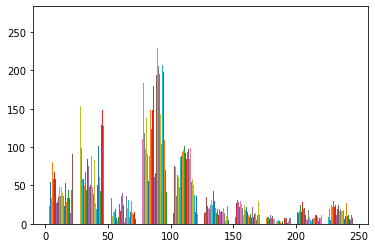

In [75]:
plt.hist(gray)

In [ ]:
ret, g = cv.threshold(gradient,0,255, cv.THRESH_OTSU)
imshow(g)
print(cv.threshold(gradient,0,255, cv.THRESH_OTSU))

In [ ]:
kernel = np.ones((2,2))
e = cv.erode(g ,kernel, iterations = 1)
e=cv.blur(e,(5,5))
imshow(e)

In [ ]:
circle3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
# kernel = np.ones((3,3),np.uint8)
kernel=circle3
closing = cv.morphologyEx(e,cv.MORPH_CLOSE,kernel, iterations = 6)
imshow(closing)

In [ ]:
d=cv.dilate(closing, circle3)
imshow(d)

In [ ]:
ret, thresh = cv.threshold(cv.morphologyEx(d,cv.MORPH_CLOSE,kernel, iterations = 3),0,255, cv.THRESH_OTSU)
imshow(thresh)

In [ ]:
count_components, markers = cv.connectedComponents(255-thresh)
print(count_components)
plt.imshow(markers, cmap="jet")
